Reviews Analysis VIA NLP [This helped](https://www.kaggle.com/ngyptr/) [and so did this.](https://www.kaggle.com/shivamb/seconds-from-disaster-text-eda-and-analysis/notebook)

In [ ]:
!pip install chart_studio

In [ ]:
import os
import sys
import json
import math
import matplotlib
import pandas as pd
from pandas import read_csv
import numpy as np
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import matplotlib.pyplot as plt
import chart_studio.plotly as py
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
import requests as rq
from wordcloud import WordCloud
import string, os, random
import textblob
from textblob import TextBlob

sns.set(color_codes=True)

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

from subprocess import check_output

from datetime import datetime

# init_notebook_mode(connected=True)
punc = string.punctuation



Importing inital libraries

In [ ]:
# data = pd.read_csv('drive/My Drive/reviews_mechanical-pencil.csv')
data = pd.read_csv('/content/drive/My Drive/reviews_thermometer.csv') #TO BE CHANGED
columns_titles = ["Date Added", "Rating Text", "Star Rating", "Review Title"]
df = data.reindex(columns=columns_titles)
df.head(10)
filename = "thermometer" #TO BE CHANGED

Loading in data

In [ ]:
counter = 0
for entry in df["Date Added"]:
    entry = entry[32:]
    df.loc[[counter], ["Date Added"]] = entry
    counter += 1

counter = 0
for entry in df["Star Rating"]:
    entry = entry[:3]
    df.loc[[counter], ["Star Rating"]] = entry
    counter += 1

counter = 0
for entry in df["Rating Text"]:
    entry = entry[:]

    df.loc[[counter], ["Rating Text"]] = entry
    counter += 1

counter = 0
for entry in df["Review Title"]:
    entry = entry[:]

    df.loc[[counter], ["Review Title"]] = entry
    counter += 1

df = df.rename(columns={"Date Added": "publish_time"})
df['publish_time'] =pd.to_datetime(df.publish_time)
df.sort_values(by='publish_time')

temp_array = []
counter = 0
temp_counter = 1
for entry in df["publish_time"]:
    temp_array.append(temp_counter)
    counter += 1
    temp_counter += 1

temp_indexdf = pd.DataFrame(temp_array)
df['sorted_index'] = temp_indexdf

In [ ]:
df['word_count'] = df['Rating Text'].apply(lambda x : len(x.split()))
df['char_count'] = df['Rating Text'].apply(lambda x : len(x.replace(" ","")))
# df['word_density'] = df['Rating Text'] / (df['char_count'] + 1)
df['punc_count'] = df['Rating Text'].apply(lambda x : len([a for a in x if a in punc]))

# df[['word_count', 'char_count', 'word_density', 'punc_count']].head(10)
df[['word_count', 'char_count', 'punc_count']].head(10)

,word_count,char_count,punc_count
0,46,197,8
1,133,602,31
2,46,167,6
3,2,17,1
4,124,613,25
5,1,13,13
6,132,552,34
7,14,64,1
8,9,55,2
9,5,27,1


In [ ]:
# lob package
def get_polarity(text):
    try:
        pol = TextBlob(text).sentiment.polarity
    except:
        pol = 0.0
    return pol

# I have already computed the sentiments and saved the file if file is not present it will compute the sentiment in real time which could be time taking
# pre_computed_path = path + 'precomputedpolarity2017headlines/precomputed_polarity.csv'
# if os.path.isfile(pre_computed_path):
#     df['polarity'] = pd.read_csv(pre_computed_path)['polarity']
# else:
#    df['polarity'] = df['headline_text'].apply(get_polarity)

df['polarity'] = df['Rating Text'].apply(get_polarity)
    
df[['polarity']].tail(10)

,polarity
2210,0.500000
2211,0.000000
2212,0.000000
2213,0.800000
2214,0.558333
2215,-0.148810
2216,0.333333
2217,0.204167
2218,0.000000
2219,0.111143


In [ ]:
df['year'] = df['publish_time'].apply(lambda x : str(x)[0:4])
df['month'] = df['publish_time'].apply(lambda x : str(x)[5:7])
df['date'] = df['publish_time'].apply(lambda x : str(x)[8:10])

df[['year', 'month', 'date']].tail(10)

,year,month,date
2210,2019,08,12
2211,2018,03,15
2212,2017,12,26
2213,2017,12,19
2214,2018,12,25
2215,2017,12,18
2216,2017,08,18
2217,2019,02,17
2218,2018,03,14
2219,2020,04,20


In [ ]:
print(df)

     publish_time                                        Rating Text  ... month date
0      2019-08-12  \n   This is the best thermometer I’ve ever us...  ...    08   12
1      2018-03-15  \n   As a nurse,  I'm going to tell it straigh...  ...    03   15
2      2019-08-12  The only con I can think of is,  I would chang...  ...    08   12
3      2017-09-11                                Highly recommend.\n  ...    09   11
4      2019-01-22  \n  (original review below)  **update**  I hav...  ...    01   22
...           ...                                                ...  ...   ...  ...
2215   2017-12-18  \n  Seems to work fine haven't had an issue bu...  ...    12   18
2216   2017-08-18                               \n  It is adequate\n  ...    08   18
2217   2019-02-17  \n  Product worked great for a little while.  ...  ...    02   17
2218   2018-03-14  \n  Compré este termometro en el año 2018, sól...  ...    03   14
2219   2020-04-20  \n  This seems to work well, but we get a diff

Initial Clean Up of Data's Mess

In [ ]:
xwords = df.word_count
trace1 = go.Histogram(x=xwords, opacity=0.65, name="Word Count", marker=dict(color='rgba(171, 50, 96, 0.6)'))
data = [trace1]
layout = go.Layout(barmode='overlay',
                   title='Distribution of Word Count of Reviews',
                   xaxis=dict(title='Word Count'),
                   yaxis=dict( title='Numer of Reviews'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)
fig.write_html(filename + "/word_count_distribution.html")

In [ ]:
xchars = df.char_count
trace1 = go.Histogram(x=xchars, opacity=0.65, name="Word Count", marker=dict(color='rgba(12, 50, 196, 0.6)'))
data = [trace1]
layout = go.Layout(barmode='overlay',
                   title='Distribution of Character Counts of Reviews',
                   xaxis=dict(title='Char Count'),
                   yaxis=dict( title='Number of Reviews'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)
fig.write_html(filename + "/char_count_distribution.html")

In [ ]:
xpc = df.punc_count
trace1 = go.Histogram(x=xpc, opacity=0.75, name="Word Count", marker=dict(color='rgba(10, 220, 150, 0.6)'))
data = [trace1]
layout = go.Layout(barmode='overlay',
                   title='Distribution of Punctuation Counts of Reviews',
                   xaxis=dict(title='Punctuation Count'),
                   yaxis=dict( title='Numer of Reviews'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)
fig.write_html(filename + "/punctuation_count_distribution.html")

In [ ]:
def create_stack_bar_data(col):
    aggregated = df[col].value_counts()
    x_values = aggregated.index.tolist()
    y_values = aggregated.values.tolist()
    return x_values, y_values

In [ ]:
x1, y1 = create_stack_bar_data('month')
trace1 = go.Bar(x=x1, y=y1, opacity=0.75, name="Monthly Reviews", marker=dict(color='rgba(10, 220, 150, 0.6)'))

x2, y2 = create_stack_bar_data('date');
trace2 = go.Bar(x=x2, y=y2, opacity=0.75, name="Daily Reviews", marker=dict(color='rgba(0, 20, 50, 0.6)'));

fig = tools.make_subplots(rows=1, cols=2, print_grid=False);
fig.append_trace(trace1, 1, 1);
fig.append_trace(trace2, 1, 2);

fig['layout'].update(height=400, title='Distribution of Frequency of Reviews Made per Month and per Day', legend=dict(orientation="h"));
iplot(fig, filename='simple-subplot');

fig.write_html(filename + "/month_vs_day_distribution.html")

/usr/local/lib/python3.6/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
x1, y1 = create_stack_bar_data('year')
trace1 = go.Bar(x=x1, y=y1, opacity=0.75, name="Yearly Reviews", marker=dict(color='rgba(110, 1, 10, 0.3)'))

x2, y2 = create_stack_bar_data('month');
trace2 = go.Bar(x=x2, y=y2, opacity=0.75, name="Monthly Reviews", marker=dict(color='rgba(30, 30, 150, 0.3)'));

fig = tools.make_subplots(rows=1, cols=2, print_grid=False);
fig.append_trace(trace1, 1, 1);
fig.append_trace(trace2, 1, 2);

fig['layout'].update(height=400, title='Distribution of Frequency of Reviews Made per Year and per Month', legend=dict(orientation="h"));
iplot(fig, filename='simple-subplot');
fig.write_html(filename + "/year_vs_month_distribution.html")

/usr/local/lib/python3.6/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
# time series of sentiment 

aggdf = df.reset_index().groupby(by=['year', 'month']).agg({'polarity':'mean'}).reset_index().rename(columns={'polairty':'sentiment'})
aggdf['month_date'] = aggdf['month'] + "-" + aggdf['year']

trace1 = go.Scatter(x = aggdf.month_date,
                    y = aggdf.polarity,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    )
data = [trace1]
layout = dict(title = 'How Sentiment of Your Product has Varied Over Time',
              xaxis= dict(title= 'Date Review was Published',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Sentiment (Higher is More Positive)',zeroline= False)
             )
fig = go.Figure(data = data, layout = layout)
iplot(fig)
fig.write_html(filename + "/sentiment_over_time_distribution.html")

Printing the top 8 positive and negative reviews:

In [ ]:
sorteddf = df.sort_values(by='polarity')
posdf = sorteddf.tail(5000)
negdf = sorteddf.head(5000)

posdf[['Rating Text']].tail(10)

file1 = open(filename + "/myfile.txt","w")
text_array = []

writing_temp_counter = 0
for entry in posdf['Rating Text'].tail(10):
  text_array.append("Your " + str(writing_temp_counter) + " most positive review was" + entry + "\n")
  if writing_temp_counter == 8:
    break
  writing_temp_counter += 1

writing_temp_counter = 0
for entry in negdf['Rating Text']:
  text_array.append("Your " + str(writing_temp_counter) + " most negative review was" + entry + "\n")
  if writing_temp_counter == 8:
    break
  writing_temp_counter += 1

file1.writelines(text_array) 
file1.close()

In [ ]:
temp_data = []

counter = 0
for entry in df["Star Rating"]:
    if float(entry) < 3.0:
      temp_data.append("Negative")
    elif float(entry) < 3.0:
      temp_data.append("Neutral")
    else:
      temp_data.append("Positive")

temporary_sentiment_dataframe = pd.DataFrame(temp_data, columns=['sentiment'])

df['Sentiment'] = temporary_sentiment_dataframe


In [ ]:
data = df[['Rating Text','Sentiment']]

data = data.rename(columns={"Rating Text": "Text"})

title_data = df[['Review Title','Sentiment']]

title_data = title_data.rename(columns={"Review Title": "Text"})

In [ ]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.1)
# Removing neutral sentiments
train = train[train.Sentiment != "Neutral"]

Positive words


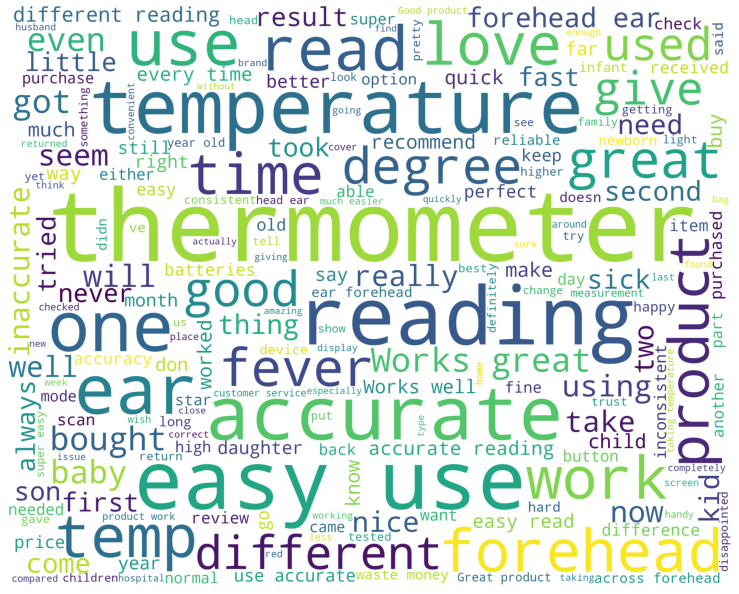

Negative words


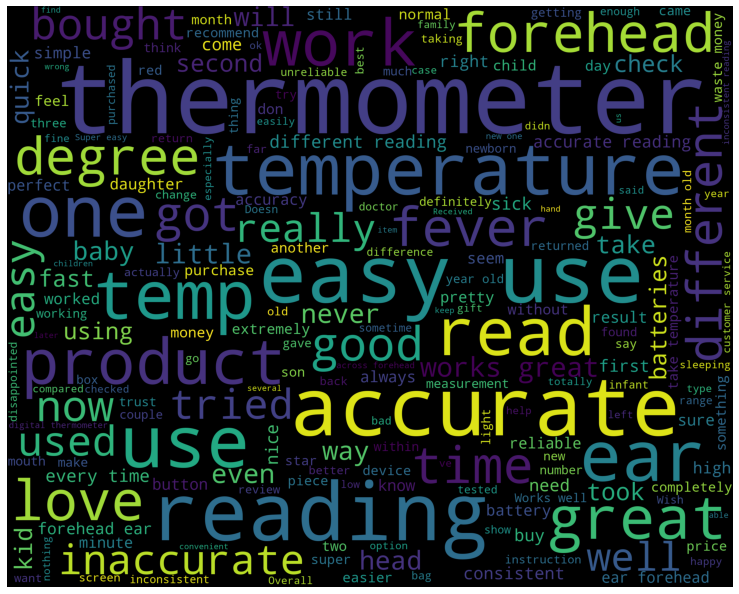

In [ ]:
train_pos = train[ train['Sentiment'] == 'Positive']
train_pos = train_pos['Text']
train_neg = train[ train['Sentiment'] == 'Negative']
train_neg = train_neg['Text']

def wordcloud_draw(data, color, index):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    if (index == 1):
      wordcloud.to_file(filename + "/positive_reviews_text_wordcloud.png")  
    elif (index == 2):
      wordcloud.to_file(filename + "/negative_reviews_text_wordcloud.png")
    else:
      wordcloud.to_file(filename + "/important_words_reviews_text_wordcloud.png")
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white', 1)
print("Negative words")
wordcloud_draw(train_neg,'black', 2)

In [ ]:
nltk.download('stopwords')
tweets = []
stopwords_set = set(stopwords.words("english"))
print(stopwords_set)

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.Text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('/n')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.Sentiment))

test_pos = test[ test['Sentiment'] == 'Positive']
test_pos = test_pos['Text']
test_neg = test[ test['Sentiment'] == 'Negative']
test_neg = test_neg['Text']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'off', 'does', 's', "aren't", "shouldn't", "weren't", 'in', 'here', 'but', "doesn't", "hasn't", 'no', "shan't", 'the', 'she', 'ain', 'between', 'am', 'on', 'under', 'who', 'd', 'ma', 'my', 'we', 'if', 'too', 'our', "it's", 'up', 'for', 'down', 'm', 'these', 'some', "don't", 'into', "won't", 'against', "mightn't", 'yours', 'your', 'that', 'being', 'then', 'just', "couldn't", 'nor', 'while', 'once', 'about', 'any', 'isn', 'mustn', 'when', 'more', 'above', 'over', 'his', 'himself', 'both', "wasn't", 'all', "hadn't", 'out', "needn't", 'do', 'couldn', 't', 'shouldn', 'were', 'them', 'to', "mustn't", 'doing', 'only', 'each', 'by', "you're", 'a', 'will', 'such', 'myself', 'at', 'shan', 'its', 'herself', 'and', 'of', 'before', 'where', 'whom', 'be', 'because', 'hers', 'further', "haven't", 'not', 'won', 'their', 'there', 'after', 'did', 'it', 'having', 'can', 'mightn', 'him',

In [ ]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

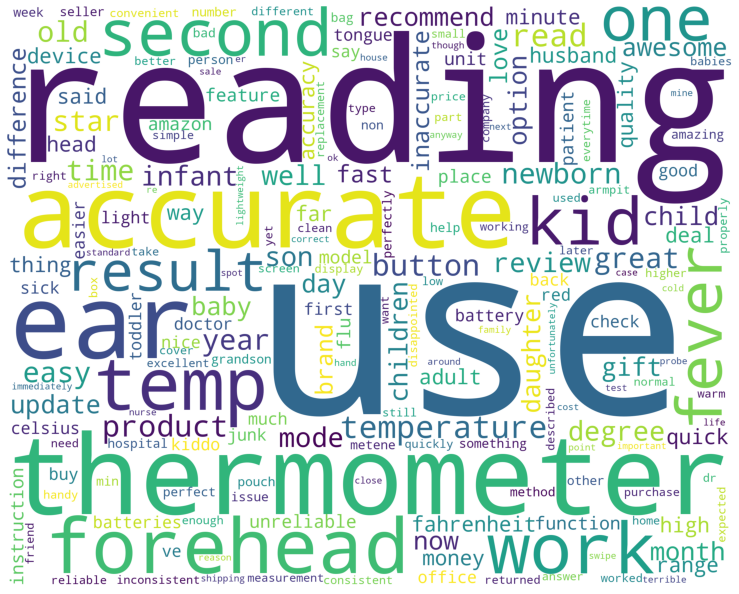

In [ ]:
wordcloud_draw(w_features, 'white', 3)


In [ ]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)


In [ ]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))    


[Negative]: 69/5 
[Positive]: 153/137 


In [ ]:
# Splitting the dataset into train and test set
train, test = train_test_split(title_data,test_size = 0.1)
# Removing neutral sentiments
train = train[train.Sentiment != "Neutral"]

Positive words


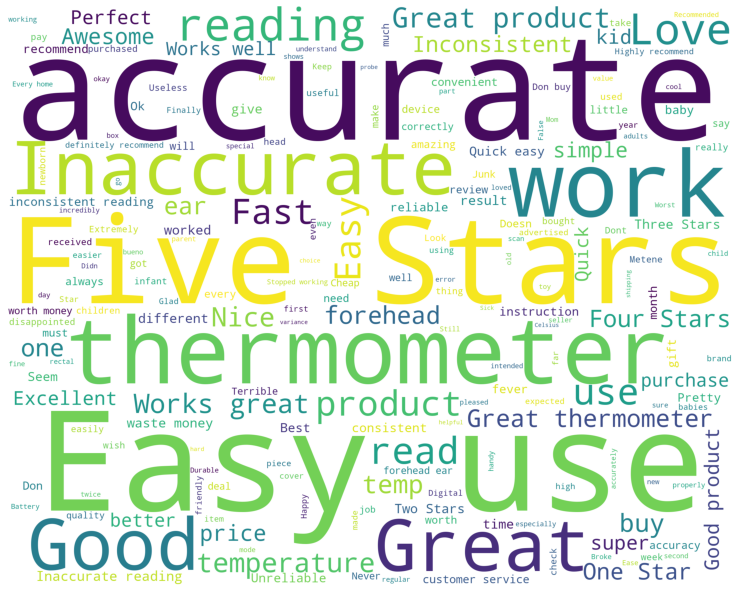

Negative words


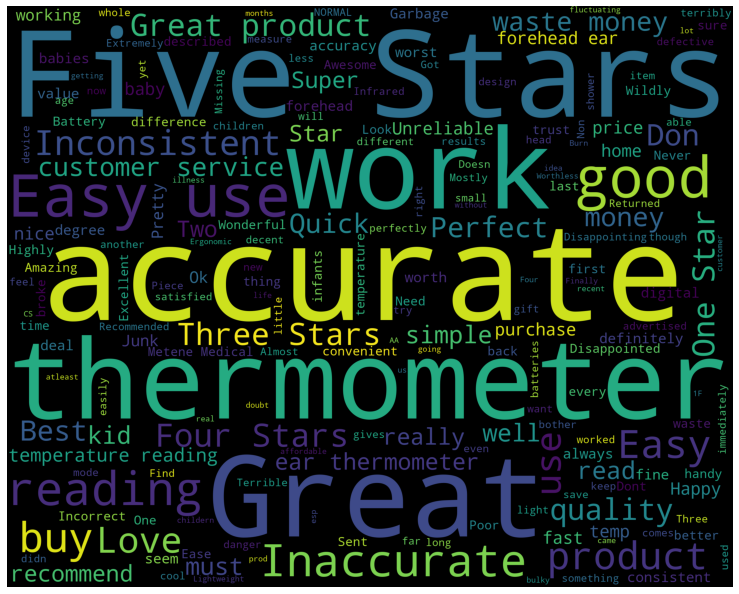

In [ ]:
train_pos = train[ train['Sentiment'] == 'Positive']
train_pos = train_pos['Text']
train_neg = train[ train['Sentiment'] == 'Negative']
train_neg = train_neg['Text']

def wordcloud_draw1(data, color, index):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    if (index == 1):
      wordcloud.to_file(filename + "/positive_reviews_titles_wordcloud.png")  
    elif (index == 2):
      wordcloud.to_file(filename + "/negative_reviews_titles_wordcloud.png")
    else:
      wordcloud.to_file(filename + "/important_words_reviews_titles_wordcloud.png")
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw1(train_pos,'white', 1)
print("Negative words")
wordcloud_draw1(train_neg, 'black', 2)

In [ ]:
nltk.download('stopwords')
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.Text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.Sentiment))

test_pos = test[ test['Sentiment'] == 'Positive']
test_pos = test_pos['Text']
test_neg = test[ test['Sentiment'] == 'Negative']
test_neg = test_neg['Text']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

  

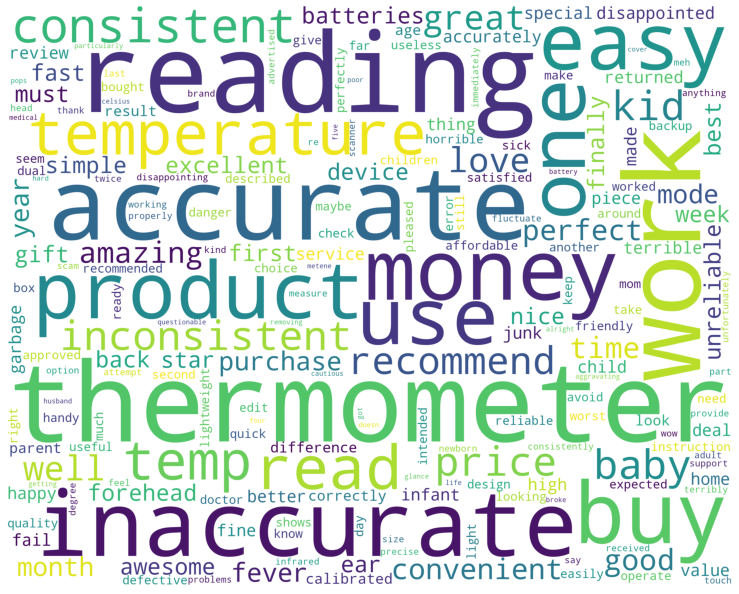

In [ ]:
wordcloud_draw1(w_features, 'white', 3)


In [ ]:
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)


In [ ]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))    


[Negative]: 77/3 
[Positive]: 145/135 


## this is gonna be fun...

for row in df.rows:
    print(row)

stop_words = set(stopwords.words("english"))
print(stop_words)

list of what is needed to do  
create new data frame where the   following things are done:
--------------
 - [x] the ratings are just the number 4.1/5 -> 4.1
 - [x] the actual text is turned into a list of words and keyword phrases
 - [x]  the times are in an actual usable format


what are the things I want to extract: [With FORMAT!]
-----------------
 - [x]  the keywords/phrases associated with high ratings -
 - [x]  the keywords/phrases associatedw tih low ratings -
 - [x]  the reviews where the sentiment doesn't match the rating -
 - [x]  the change in keyword frequency over time -
 - [x]  change in sentiment over time


ideas for further iteration:
-----------------
 - [x]  use the specs of the product - check * if there is a match in words, if so, do a sentiment analysis to see what 
 - [x] specifc aspect could be changed


output:
result = df.to_json(orient="split")
parsed = json.loads(result)
print(json.dumps(parsed, indent=4))